In [ ]:
import shutil

extraction_path = '/content/drive/MyDrive/Abdelrahman_s/Microscopic/OCSS/OCSS'


try:
    shutil.rmtree(extraction_path)  # This will delete the directory and its contents
    print(f"Deleted {extraction_path}")
except FileNotFoundError:
    print(f"{extraction_path} not found")
except PermissionError:
    print(f"Permission denied to delete {extraction_path}")
except Exception as e:
    print(f"An error occurred: {str(e)}")


Deleted /content/drive/MyDrive/Abdelrahman_s/Microscopic/OCSS/OCSS


In [ ]:
import shutil

extraction_path = '/content/drive/MyDrive/Abdelrahman_s/Microscopic/Fibrosarcma/Fibrosarcma'


try:
    shutil.rmtree(extraction_path)  # This will delete the directory and its contents
    print(f"Deleted {extraction_path}")
except FileNotFoundError:
    print(f"{extraction_path} not found")
except PermissionError:
    print(f"Permission denied to delete {extraction_path}")
except Exception as e:
    print(f"An error occurred: {str(e)}")


/content/drive/MyDrive/Abdelrahman_s/Microscopic/Fibrosarcma/Fibrosarcma not found


In [ ]:
import shutil

extraction_path = '/content/drive/MyDrive/Abdelrahman_s/Microscopic/Round_cell_tumors/Round_cell_tumors'


try:
    shutil.rmtree(extraction_path)  # This will delete the directory and its contents
    print(f"Deleted {extraction_path}")
except FileNotFoundError:
    print(f"{extraction_path} not found")
except PermissionError:
    print(f"Permission denied to delete {extraction_path}")
except Exception as e:
    print(f"An error occurred: {str(e)}")


Deleted /content/drive/MyDrive/Abdelrahman_s/Microscopic/Round_cell_tumors/Round_cell_tumors


In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/Abdelrahman_s/Microscopic/Fibrosarcma.zip'
extraction_path = '/content/drive/MyDrive/Abdelrahman_s/Microscopic/Fibrosarcma/Fibrosarcma'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/Abdelrahman_s/Microscopic/(Round_cell)hist_thesis.v4-full.folder.zip'
extraction_path = '/content/drive/MyDrive/Abdelrahman_s/Microscopic/Round_cell_tumors/Round_cell_tumors'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/Abdelrahman_s/Microscopic/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data.zip'
extraction_path = '/content/drive/MyDrive/Abdelrahman_s/Microscopic/OCSS/OCSS'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

In [ ]:
import os
import cv2
import numpy as np
from sklearn.metrics import accuracy_score
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
import pandas as pd

In [ ]:

def apply_histogram_equalization(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    return cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

In [ ]:
def load_data(df):
    images = []
    labels = []
    for index, row in df.iterrows():

        image_path = os.path.join(data_path, 'NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/patch/patch/patch/images', row['path'])
        if os.path.isfile(image_path):
            image = cv2.imread(image_path)
            if image is not None:

                image = apply_histogram_equalization(image)
                image = cv2.resize(image, (224, 224))
                images.append(image)
                labels.append(row['label'])
            else:
                print(f"Failed to read image: {image_path}")
        else:
            print(f"File not found: {image_path}")

    if not images:
        print("No valid images found.")

    return np.array(images), np.array(labels)

In [ ]:
data_path = '/content/drive/MyDrive/Abdelrahman_s/Microscopic/OCSS/OCSS'
csv_file_path = '/content/drive/MyDrive/Abdelrahman_s/Microscopic/OCSS/OCSS/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/patch/patch/patch/sabpatch_parsed_test.csv'
df = pd.read_csv(csv_file_path)
class_mapping = {'OSCC': 0, 'Without dysplasia': 1, 'With dysplasia': 2}
df['label'] = df['lesion'].map(class_mapping)
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)
test_df, valid_df = train_test_split(test_df, test_size=0.5, random_state=42)
X_train, y_train = load_data(train_df)
X_test, y_test = load_data(test_df)
X_valid, y_valid = load_data(valid_df)


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

base_model = ResNet50(weights='imagenet', include_top=False)
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

for layer in base_model.layers[:-30]:
     layer.trainable = True

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
def schedule(epoch, lr):
    if epoch < 50:
        return 0.0001
    elif epoch < 100:
        return 0.00005
    else:
        return 0.00001

lr_scheduler = LearningRateScheduler(schedule)
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)
model.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_valid, y_valid), epochs=200, callbacks=[checkpoint, early_stopping, lr_scheduler], class_weight=class_weight_dict)
best_model = load_model("best_model.h5")
predictions = best_model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Test Accuracy: {accuracy}")


Epoch 1/200
14/14 [==============================] - ETA: 0s - loss: 1.2988 - accuracy: 0.4315
Epoch 1: val_accuracy improved from -inf to 0.51579, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - 37s 491ms/step - loss: 1.2988 - accuracy: 0.4315 - val_loss: 1.0343 - val_accuracy: 0.5158 - lr: 1.0000e-04
Epoch 2/200
14/14 [==============================] - ETA: 0s - loss: 1.0268 - accuracy: 0.4954
Epoch 2: val_accuracy did not improve from 0.51579
14/14 [==============================] - 6s 375ms/step - loss: 1.0268 - accuracy: 0.4954 - val_loss: 1.0844 - val_accuracy: 0.5053 - lr: 1.0000e-04
Epoch 3/200
14/14 [==============================] - ETA: 0s - loss: 0.9174 - accuracy: 0.5662
Epoch 3: val_accuracy improved from 0.51579 to 0.53684, saving model to best_model.h5
14/14 [==============================] - 7s 454ms/step - loss: 0.9174 - accuracy: 0.5662 - val_loss: 0.9297 - val_accuracy: 0.5368 - lr: 1.0000e-04
Epoch 4/200
14/14 [==============================] - ETA: 0s - loss: 0.8455 - accuracy: 0.6050
Epoch 4: val_accuracy improved from 0.53684 to 0.60000, saving model to best_model.h5
14/14 [==============================] - 7s 475

94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/200
55/55 [==============================] - ETA: 0s - loss: 1.3691 - accuracy: 0.3425
Epoch 1: val_accuracy improved from -inf to 0.37895, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


55/55 [==============================] - 43s 200ms/step - loss: 1.3691 - accuracy: 0.3425 - val_loss: 1.3734 - val_accuracy: 0.3789 - lr: 1.0000e-05
Epoch 2/200
55/55 [==============================] - ETA: 0s - loss: 1.1217 - accuracy: 0.4384
Epoch 2: val_accuracy improved from 0.37895 to 0.46316, saving model to best_model.h5
55/55 [==============================] - 9s 171ms/step - loss: 1.1217 - accuracy: 0.4384 - val_loss: 1.1858 - val_accuracy: 0.4632 - lr: 1.0000e-05
Epoch 3/200
55/55 [==============================] - ETA: 0s - loss: 1.0821 - accuracy: 0.4566
Epoch 3: val_accuracy improved from 0.46316 to 0.52632, saving model to best_model.h5
55/55 [==============================] - 9s 170ms/step - loss: 1.0821 - accuracy: 0.4566 - val_loss: 1.0375 - val_accuracy: 0.5263 - lr: 1.0000e-05
Epoch 4/200
55/55 [==============================] - ETA: 0s - loss: 0.9881 - accuracy: 0.4886
Epoch 4: val_accuracy improved from 0.52632 to 0.54737, saving model to best_model.h5
55/55 [=====

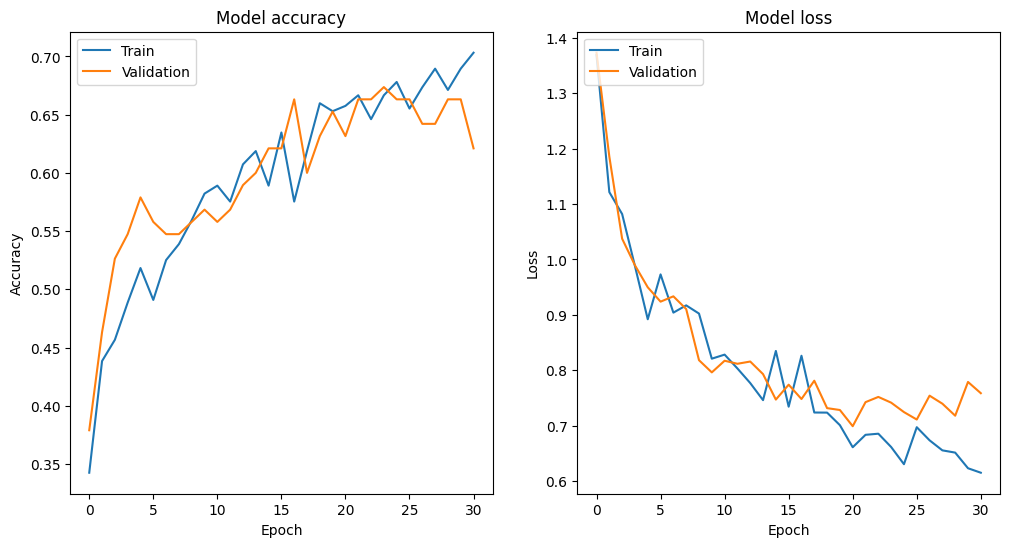

3/3 [==============================] - 2s 335ms/step
Test Accuracy: 0.723404255319149


In [ ]:
import os
import cv2
import numpy as np
from sklearn.metrics import accuracy_score
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, TensorBoard
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
import pandas as pd
import matplotlib.pyplot as plt

def apply_histogram_equalization(image):
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    limg = cv2.merge((cl, a, b))
    return cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

data_path = '/content/drive/MyDrive/Abdelrahman_s/Microscopic/OCSS/OCSS'

csv_file_path = '/content/drive/MyDrive/Abdelrahman_s/Microscopic/OCSS/OCSS/NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/patch/patch/patch/sabpatch_parsed_test.csv'
df = pd.read_csv(csv_file_path)

class_mapping = {'OSCC': 0, 'Without dysplasia': 1, 'With dysplasia': 2}
df['label'] = df['lesion'].map(class_mapping)

train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)
test_df, valid_df = train_test_split(test_df, test_size=0.5, random_state=42)

def load_data(df):
    images = []
    labels = []
    for index, row in df.iterrows():
        image_path = os.path.join(data_path, 'NDB-UFES An oral cancer and leukoplakia dataset composed of histopathological images and patient data/patch/patch/patch/images', row['path'])
        if os.path.isfile(image_path):
            image = cv2.imread(image_path)
            if image is not None:
                image = apply_histogram_equalization(image)
                image = cv2.resize(image, (224, 224))
                images.append(image)
                labels.append(row['label'])
            else:
                print(f"Failed to read image: {image_path}")
        else:
            print(f"File not found: {image_path}")

    if not images:
        print("No valid images found.")

    return np.array(images), np.array(labels)

X_train, y_train = load_data(train_df)
X_test, y_test = load_data(test_df)
X_valid, y_valid = load_data(valid_df)

datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.4,
    height_shift_range=0.4,
    shear_range=0.4,
    zoom_range=0.4,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

base_model = ResNet50(weights='imagenet', include_top=False)
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

optimizer = Adam(learning_rate=0.00001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

def schedule(epoch, lr):
    if epoch < 50:
        return 0.00001
    elif epoch < 100:
        return 0.000005
    else:
        return 0.000001

lr_scheduler = LearningRateScheduler(schedule)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

# Set up TensorBoard
log_dir = '/content/drive/MyDrive/Abdelrahman_s/Microscopic/OCSSlogs/'
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(datagen.flow(X_train, y_train, batch_size=8),
                    validation_data=(X_valid, y_valid),
                    epochs=200,
                    callbacks=[checkpoint, early_stopping, lr_scheduler, tensorboard_callback],
                    class_weight=class_weight_dict)

plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Load the best model for evaluation
best_model = load_model("best_model.h5")

# Evaluate on the test set
predictions = best_model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Test Accuracy: {accuracy}")


In [ ]:
!tensorboard --logdir= /content/drive/MyDrive/Abdelrahman_s/Microscopic/OCSSlogs

2024-01-21 22:36:48.939158: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-21 22:36:48.939209: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-21 22:36:48.940691: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-21 22:36:49.893001: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC] [--host ADDR]
                   [--bind_all] [--port PORT] [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTR

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/drive/MyDrive/Abdelrahman_s/Microscopic/OCSSlogs


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
  %reload_ext tensorboard